In [ ]:
import datetime as dt
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
# from scipy.stats import mannwhitneyu, ttest_ind

In [ ]:
# use science style 
plt.style.use(['science', 'no-latex', 'russian-font'])

sns.set_palette('colorblind')
# sns.set_context('talk')
plt.rcParams["font.family"] = "Times"
plt.rcParams.update({'font.size':16})

In [ ]:
LANGUAGE = "RU"

In [ ]:
df = pd.read_excel('../data/organic_acids.xlsx', sheet_name='Лист1')
df = df.drop(columns=['Code'])

In [ ]:
df.columns

Index(['type', 'days', 'Щавлевая', 'Фумаровая', 'Янтарная', 'Яблочная',
       'Лимонная', 'Уксусная', 'Пропионовая', 'Молочная', 'Бензойная',
       'Сорбиновая', 'Sum'],
      dtype='object')

In [ ]:
df_melted = pd.melt(df, id_vars= ['type', 'days'],
        value_vars=['Щавлевая', 'Фумаровая', 'Янтарная', 'Яблочная',
       'Лимонная', 'Уксусная', 'Пропионовая', 'Молочная', 'Бензойная',
       'Сорбиновая','Sum'])

In [ ]:
species_namer = {'bacteria': 'Бактерии', 
              'control':'Контроль', 
              'fungi':'Грибы'}

df_melted['type_ru'] = df_melted['type'].apply(lambda x: species_namer[x])
df_melted['type_ru'].unique()

array(['Бактерии', 'Грибы', 'Контроль'], dtype=object)

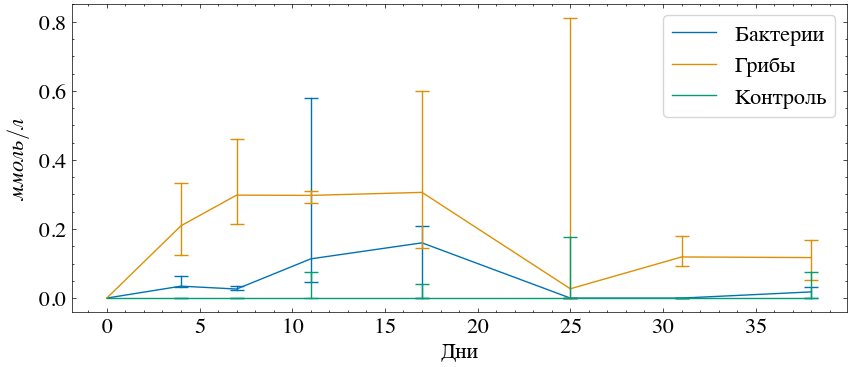

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
# type = 'bacteria'
mask = (df_melted['variable']=='Sum') #& (df_melted['type']==type)
sns.lineplot(data=df_melted.loc[mask],
             errorbar=lambda x: (x.min(), x.max()),
                err_style='bars',
                 estimator='median',
             err_kws={'capsize':5, 'elinewidth': 1},
             y='value', x='days', hue='type_ru')
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.4)
# ax.text(0.03, 0.95, type.capitalize(), transform=ax.transAxes, fontsize=16,
#             verticalalignment='top', bbox=props)
leg=ax.legend(frameon=True)  
ax.set_ylabel('$ммоль/л$')
ax.set_xlabel('Дни')
plt.savefig('../plots/organic_acids_bacteria_RU.png', dpi=300)
plt.show()